In [ ]:
!pip install wordcloud
!pip install nltk
!pip install tweet-preprocessor

from wordcloud import WordCloud, STOPWORDS
from datetime import timedelta, datetime
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from types import SimpleNamespace
import matplotlib.pyplot as plt 
from tweepy import OAuthHandler
from textblob import TextBlob
import preprocessor as p
import seaborn as sns
import pandas as pd
import numpy as np
import json
import re
import tweepy
import csv
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv("Sinovac_translate.csv")

In [ ]:
data

,Unnamed: 0,username,tweetcreatedts,text,english
0,0,DRonodipuro,2021-11-17 23:57:23,Daftar penyakit yang perlu perhatian lebih seb...,List of diseases that need more attention befo...
1,1,nusabalicom,2021-11-17 23:45:25,"Tinggal 5,69 Persen Warga Tabanan Belum Divaks...",Stayed 5.69 percent of Tabanan residents have ...
2,2,WantedTeenZ,2021-11-17 23:17:12,#COVID19 : 95.4 peratus populasi dewasa negara...,# COVID19: 95.4 Percentage of complete country...
3,3,AndyTantono,2021-11-17 22:38:17,Sabar! Vaksinasi anak usia 6-11 tahun dimulai ...,Be patient!Vaccination of children aged 6-11 y...
4,4,KontanNews,2021-11-17 22:30:03,Sabar! Vaksinasi anak usia 6-11 tahun dimulai ...,Be patient!Vaccination of children aged 6-11 y...
...,...,...,...,...,...
699,699,kepowin,2021-11-11 01:25:13,Kode Redeem Genshin Impact 11 November 2021 Te...,Redeem code genshin impact 11 november 2021 ne...
700,700,Maharani121212,2021-11-11 01:25:12,Kode Redeem Genshin Impact 11 November 2021 Te...,Redeem code genshin impact 11 november 2021 ne...
701,701,Andespen1,2021-11-11 01:20:00,Top News Koran Rakyat Merdeka\n\nStok Vaksin M...,Top News Merdeka Rakyat Newspaper\n\nMore vacc...
702,702,HBaturiti,2021-11-11 01:16:17,Indonesia Sehat Dengan Vaksin Covid-19. #vaksi...,Healthy Indonesia with Covid-19 vaccine.#VakSi...


In [ ]:
#mengecek apakah terdapat data yang kosong atau tidak
data.isnull().sum()

Unnamed: 0        0
username          0
tweetcreatedts    0
text              0
english           0
dtype: int64

# **Pembersihan data**

In [ ]:
def preprocessing_data(x):
    return p.clean(x)

def tokenize_data(x):
    return p.tokenize(x)

data['bersih'] = data['english'].apply(preprocessing_data)
data['bersih'] = data['bersih'].apply(tokenize_data)
data = data.drop_duplicates()

In [ ]:
#lowercase everything
data["bersih"] = data["bersih"].str.lower()

#menghapus username dari teks
pattern = r'(http://[^"\s]+)|(@\w+)'
data['bersih']=data['bersih'].str.replace(pattern, "")

#menghapus hashtag
data['bersih'] = data['bersih'].str.replace('#(\w+)','')

#penghapusan new lines
data['bersih'] = data['bersih'].replace(r'\\n',' ', regex=True)
data['bersih'] = data['bersih'].replace(r'\n',' ', regex=True)

#menghapus (b') dari teks
data['bersih'] = data['bersih'].str.replace("b'", '')

#menghapus link
data['bersih'] = data['bersih'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

#penghapusan tanda baca
data['bersih'] = data['bersih'].str.replace('[^\w\s]','')

#menghapus (rt) dari teks
data['bersih'] = data['bersih'].str.replace("rt", '')

#menghapus huruf tidak jelas
data['bersih'] = data['bersih'].str.replace('xc(\w+)','')
data['bersih'] = data['bersih'].str.replace('xf(\w+)','')

# **Menghitung polaritas**

In [ ]:
#menentukan polaritas dan subjektivitas
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data['bersih'].apply(getSubjectivity)
data['Polarity'] = data['bersih'].apply(getPolarity)

data

,Unnamed: 0,username,tweetcreatedts,text,english,bersih,Subjectivity,Polarity
0,0,DRonodipuro,2021-11-17 23:57:23,Daftar penyakit yang perlu perhatian lebih seb...,List of diseases that need more attention befo...,list of diseases that need more attention befo...,0.50,0.5
1,1,nusabalicom,2021-11-17 23:45:25,"Tinggal 5,69 Persen Warga Tabanan Belum Divaks...",Stayed 5.69 percent of Tabanan residents have ...,stayed percent of tabanan residents have not b...,0.00,0.0
2,2,WantedTeenZ,2021-11-17 23:17:12,#COVID19 : 95.4 peratus populasi dewasa negara...,# COVID19: 95.4 Percentage of complete country...,covid19 percentage of complete country adult p...,0.35,0.1
3,3,AndyTantono,2021-11-17 22:38:17,Sabar! Vaksinasi anak usia 6-11 tahun dimulai ...,Be patient!Vaccination of children aged 6-11 y...,be patientvaccination of children aged number ...,0.40,-0.1
4,4,KontanNews,2021-11-17 22:30:03,Sabar! Vaksinasi anak usia 6-11 tahun dimulai ...,Be patient!Vaccination of children aged 6-11 y...,be patientvaccination of children aged number ...,0.40,-0.1
...,...,...,...,...,...,...,...,...
699,699,kepowin,2021-11-11 01:25:13,Kode Redeem Genshin Impact 11 November 2021 Te...,Redeem code genshin impact 11 november 2021 ne...,redeem code genshin impact november newest vir...,0.00,0.0
700,700,Maharani121212,2021-11-11 01:25:12,Kode Redeem Genshin Impact 11 November 2021 Te...,Redeem code genshin impact 11 november 2021 ne...,redeem code genshin impact november newest vir...,0.00,0.0
701,701,Andespen1,2021-11-11 01:20:00,Top News Koran Rakyat Merdeka\n\nStok Vaksin M...,Top News Merdeka Rakyat Newspaper\n\nMore vacc...,top news merdeka rakyat newspapermore vaccine ...,0.50,0.5
702,702,HBaturiti,2021-11-11 01:16:17,Indonesia Sehat Dengan Vaksin Covid-19. #vaksi...,Healthy Indonesia with Covid-19 vaccine.#VakSi...,healthy indonesia with covid19 vaccine vaksnco...,0.50,0.5


In [ ]:
#Menentukan sentimen
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0 :
    return 'Neutral'
  else :
    return  'Positive'

data['Sentimen'] = data['Polarity'].apply(getAnalysis)

data

,Unnamed: 0,username,tweetcreatedts,text,english,bersih,Subjectivity,Polarity,Sentimen
0,0,DRonodipuro,2021-11-17 23:57:23,Daftar penyakit yang perlu perhatian lebih seb...,List of diseases that need more attention befo...,list of diseases that need more attention befo...,0.50,0.5,Positive
1,1,nusabalicom,2021-11-17 23:45:25,"Tinggal 5,69 Persen Warga Tabanan Belum Divaks...",Stayed 5.69 percent of Tabanan residents have ...,stayed percent of tabanan residents have not b...,0.00,0.0,Neutral
2,2,WantedTeenZ,2021-11-17 23:17:12,#COVID19 : 95.4 peratus populasi dewasa negara...,# COVID19: 95.4 Percentage of complete country...,covid19 percentage of complete country adult p...,0.35,0.1,Positive
3,3,AndyTantono,2021-11-17 22:38:17,Sabar! Vaksinasi anak usia 6-11 tahun dimulai ...,Be patient!Vaccination of children aged 6-11 y...,be patientvaccination of children aged number ...,0.40,-0.1,Negative
4,4,KontanNews,2021-11-17 22:30:03,Sabar! Vaksinasi anak usia 6-11 tahun dimulai ...,Be patient!Vaccination of children aged 6-11 y...,be patientvaccination of children aged number ...,0.40,-0.1,Negative
...,...,...,...,...,...,...,...,...,...
699,699,kepowin,2021-11-11 01:25:13,Kode Redeem Genshin Impact 11 November 2021 Te...,Redeem code genshin impact 11 november 2021 ne...,redeem code genshin impact november newest vir...,0.00,0.0,Neutral
700,700,Maharani121212,2021-11-11 01:25:12,Kode Redeem Genshin Impact 11 November 2021 Te...,Redeem code genshin impact 11 november 2021 ne...,redeem code genshin impact november newest vir...,0.00,0.0,Neutral
701,701,Andespen1,2021-11-11 01:20:00,Top News Koran Rakyat Merdeka\n\nStok Vaksin M...,Top News Merdeka Rakyat Newspaper\n\nMore vacc...,top news merdeka rakyat newspapermore vaccine ...,0.50,0.5,Positive
702,702,HBaturiti,2021-11-11 01:16:17,Indonesia Sehat Dengan Vaksin Covid-19. #vaksi...,Healthy Indonesia with Covid-19 vaccine.#VakSi...,healthy indonesia with covid19 vaccine vaksnco...,0.50,0.5,Positive


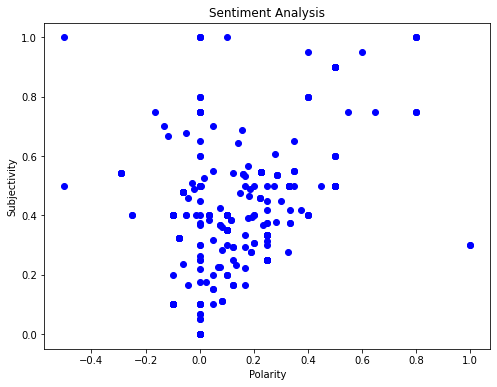

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, data.shape[0]):
  plt.scatter(data['Polarity'][i],data['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

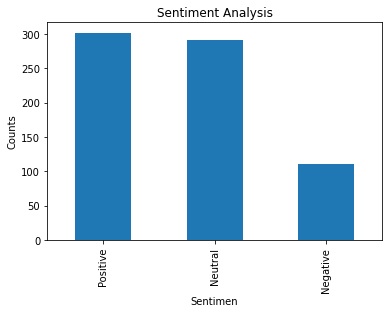

In [ ]:
data['Sentimen'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentimen')
plt.ylabel('Counts')
data['Sentimen'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

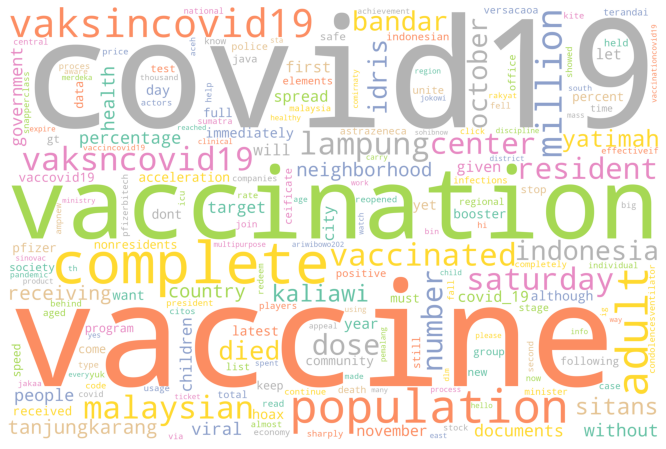

In [ ]:
all_words = ' '.join([tweets for tweets in data['bersih']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

In [ ]:
from google.colab import files
data.to_csv('SentimenAnalisis.csv') 
files.download('SentimenAnalisis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>